<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/ConstantPrBoundary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Reservoir Simulation : Constant Pressure Boundary case. 

Divyanshu Vyas | dvyas13ad@gmail.com

Ref. : T. Ertekin | Abou Kassem etc.

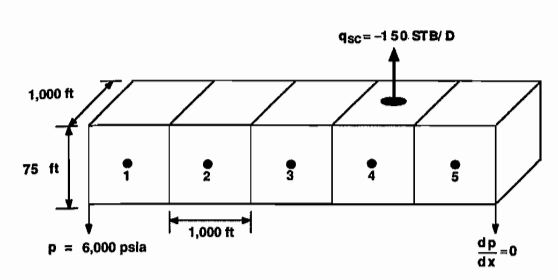

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:

#Initialization

# Pi = 6000

dx = 1000
dy = 1000
dz = 75

B = 1 #RB/STB
c = 3.5*(10**(-6)) #psi-1

kx = 15 #mD
phi= 0.18

mu = 10 #cp

dt = 10 #days

#Well Block index wb

wb = 3 # 0,1,2,3 (block 4)

In [4]:
#Calclulation

Ax = dy*dz #ft2

Vb = dx*dy*dz #ft3

qsc_wb = -150 #stb/d

Tx = (0.001127)*(kx)*(Ax)/(mu*B*dx)

M = 5.615*B*dt/Vb/phi/c

In [9]:
P = np.ones(5)*6000

In [5]:
t = np.arange(0,370,dt)
# t
len(t)

37

In [6]:
#creating a space-time 2D matrix
P_r = np.zeros((37,5))

In [8]:
P_r[0] = np.ones(5)*6000

# P_r

In [14]:
wb = 3 #can ask user input as well.
qsc = np.array([0,0,0,-150,0])

#West Boundary Pressure
P_w = 6000 #psi

for j in range(1,len(t)):

  for i in range(1, len(P)-1):

    P_r[j,i] = P_r[j-1,i] + M*qsc[i] + M*(Tx*(P_r[j-1,i-1] - P_r[j-1,i]) + Tx*(P_r[j-1,i+1] - P_r[j-1,i]))
  
  P_r[j,0] = P_w

  P_r[j,-1]= P_r[j-1,-1] +  M*qsc[-1] + M*(Tx*(P_r[j-1,-2] - P_r[j-1,-1]))


In [15]:
P_response = pd.DataFrame(P_r)

In [21]:
temp = P_response.copy()

temp['Time(days)'] = t

In [43]:
temp.columns = [0, 1, 2, 3, 4, 'Time(days)']

In [24]:
P_nfb = np.zeros((37,5))
P_nfb[0] = P

# P_nfb



wb = 3 #can ask user input as well.
qsc = np.array([0,0,0,-150,0])
# T = np.array([0,Tx,Tx,Tx,Tx,0])





for j in range(1,len(t)):
  
  # P[0] = P[0] + M*qsc[0] + M*(Tx*(P[1] - P[0]))
  # P[-1] = P[-1] + M*qsc[-1] + M*(Tx*(P[-2] - P[-1]))

  for i in range(1, len(P)-1):
    P_nfb[j,i] = P_nfb[j-1,i] + M*qsc[i] + M*(Tx*(P_nfb[j-1,i-1] - P_nfb[j-1,i]) + Tx*(P_nfb[j-1,i+1] - P_nfb[j-1,i]))
  
  
  P_nfb[j,0] = P_nfb[j-1,0] +  M*qsc[0] + M*(Tx*(P_nfb[j-1,1] - P_nfb[j-1,0]))
  P_nfb[j,-1]= P_nfb[j-1,-1] +  M*qsc[-1] + M*(Tx*(P_nfb[j-1,-2] - P_nfb[j-1,-1]))

In [27]:
df_nfb = pd.DataFrame(P_nfb)

temp_nfb = df_nfb.copy()

temp_nfb['Time(days)'] = t

In [41]:
# temp_nfb
# temp_nfb.columns = [ '0' , '1' , '2' , '3' , '4' , 'Time(days)']

In [ ]:
wb = 3 #can ask user input as well.
qsc = np.array([0,0,0,-150,0])

#West Boundary Pressure
# P_w = 6000 #psi

for j in range(1,len(t)):

  for i in range(1, len(P)-1):

    P_r[j,i] = P_r[j-1,i] + M*qsc[i] + M*(Tx*(P_r[j-1,i-1] - P_r[j-1,i]) + Tx*(P_r[j-1,i+1] - P_r[j-1,i]))
  
  P_r[j,0] = P_w

  P_r[j,-1]= P_r[j-1,-1] +  M*qsc[-1] + M*(Tx*(P_r[j-1,-2] - P_r[j-1,-1]))

In [17]:
#A very nice Realization. 

#Imagine a Constant Pressure boundary at the left to be like a STRONG AQUIFER.

#1.
#Observe that to make sure the boundary Pressure is constant, the adjacent block
# ie, block 1 must have P1 = P_w = 6000, so that no pressure drop and hence no flow
# and constant pr. throughout. 

#2. 
#A constant Pressure Strong Aquifer right next to a block (ideally) would never 
#let the block pressure drop. Right? Yes. That's why P = 6000 Throughout. 

In [40]:
temp_nfb.columns = ['0' , '1' , '2' , '3' , '4' , 'Time(days)']

temp_nfb.columns

Index(['0', '1', '2', '3', '4', 'Time(days)'], dtype='object')

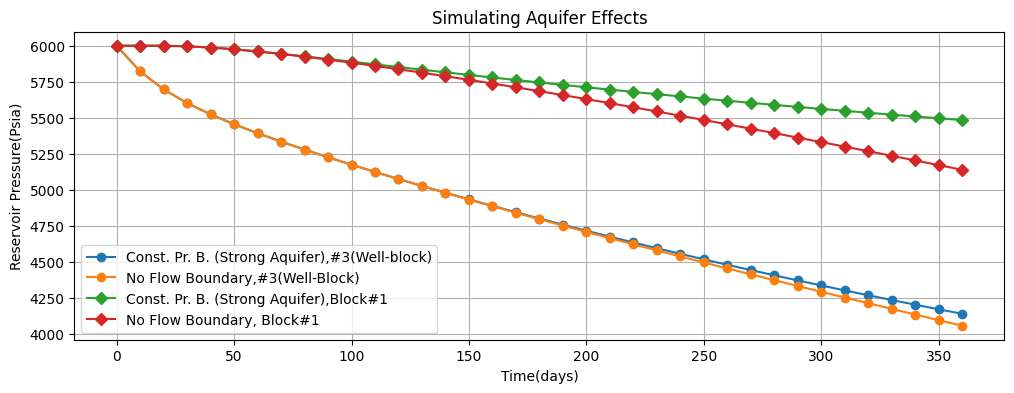

In [56]:
plt.figure(figsize=(12,4))

plt.style.use('default')

plt.plot(temp['Time(days)'] , temp[3] ,marker = 'o', label='Const. Pr. B. (Strong Aquifer),#3(Well-block)')
plt.plot(temp_nfb['Time(days)'] , temp_nfb['3'],marker = 'o', label='No Flow Boundary,#3(Well-Block)')

plt.plot(temp['Time(days)'] , temp[1] ,marker = 'D', label='Const. Pr. B. (Strong Aquifer),Block#1')
plt.plot(temp_nfb['Time(days)'] , temp_nfb['1'],marker = 'D', label='No Flow Boundary, Block#1')

plt.ylabel('Reservoir Pressure(Psia)')
plt.xlabel('Time(days)')

plt.title('Simulating Aquifer Effects')

plt.grid()

plt.legend(loc='best')

In [50]:
# plt.style.use('default')

# temp_nfb[0]

temp.head()

,0,1,2,3,4,Time(days)
0,6000.0,6000.000000,6000.000000,6000.000000,6000.000000,0
1,6000.0,6000.000000,6000.000000,5821.746032,6000.000000,10
2,6000.0,6000.000000,5973.142623,5697.206817,5973.142623,20
3,6000.0,5995.953421,5935.614184,5602.102885,5931.567605,30
4,6000.0,5987.471853,5894.455577,5523.738961,5881.927430,40
